<a href="https://colab.research.google.com/github/Gerundio98/Cedula.Desarrollo-de-Software-II/blob/main/Bloque_1_Introd_a_NLP_(Semana_EOI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EOI - Introducción al NLP**
### **Bloque 1 -** Spacy: *Words Embeddings*

---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentación sobre una función escribiendo **?** justo después de una función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

### 🌟 **Documentación de SpaCy**: https://spacy.io/

Primero, instalamos la librería actualizada de Spacy y descargamos los modelos que de lenguaje que vayamos a utilizar. En la documentación de Spacy podremos encontrar las instrucciones correctas según nuestras necesidades.

In [1]:
!pip install -U spacy
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**🖐️Importante:** Es posible que sea necesario reiniciar Google Colab en la pestaña **'Entorno de Ejecución'** > **'Reiniciar entorno de ejecución'** para completar la instalación.

Una vez instalado, cargamos el modelo a utilizar. En este caso será el modelo de Español grande *(large: lg)*. Utilizar un modelo pequeño *(small: sm)* no nos brindaría los vectores de embedding que buscamos utilizar.

In [2]:
import spacy

# Cargamos el modelo grande en Español.
nlp = spacy.load("es_core_news_lg")

In [3]:
text = """La inteligencia artificial es en informática, la inteligencia expresada por máquinas,
          sus procesadores y sus softwares, que serían los análogos al cuerpo, el cerebro y la mente,
          respectivamente, a diferencia de la inteligencia natural demostrada por humanos y ciertos
          animales con cerebros complejos. 1​ Se considera que el origen de la IA se remonta a los intentos
          del hombre desde la antigüedad por incrementar sus potencialidades físicas e intelectuales,
          creando artefactos con automatismos y simulando la forma y las habilidades de los seres humanos."""

# Procesamos el texto.
doc = nlp(text)

# Podemos empezar a utilizar Spacy para analizar los elementos del texto.
print("Nouns:", [token.lemma_ for token in doc if token.pos_ == "NOUN"])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Nouns: ['inteligencia', 'informática', 'inteligencia', 'máquina', 'procesador', 'software', 'cuerpo', 'cerebro', 'mente', 'diferencia', 'inteligencia', 'humanos', 'animal', 'cerebro', 'origen', 'intento', 'hombre', 'antigüedad', 'potencialidad', 'artefacto', 'automatismo', 'forma', 'habilidad', 'ser']
Verbs: ['considerar', 'remontar', 'incrementar', 'crear', 'simular']


In [4]:
# Podemos utilizar Spacy para analizar el Part-OF Speech (POS)
for token in doc[0:5]:
  print(token.pos_ , ":", token)

DET : La
NOUN : inteligencia
ADJ : artificial
AUX : es
ADP : en


In [5]:
# Procesamos una nueva frase.
doc = nlp("gato perro avión coche ordenador manzana móvil dos tres cuatro cinco")

# Extraemos palabras.
word0 = doc[0]
word1 = doc[1]
word2 = doc[2]

# Calculamos la similitud entre dos palabras.
print(word0.similarity(word2))

# Calculamos la similitud entre dos frases.
doc1 = nlp("Me gusta ir al parque, pero no ir al supermercado")
doc2 = nlp("Disfruto yendo al parque, no tanto yendo a comprar al supermercado")
doc3 = nlp("La prima de riesgo cayó drásticamente desde 2012")

print("Similitud Frase 1 y 2:", doc1.similarity(doc2))
print("Similitud Frase 1 y 3:", doc1.similarity(doc3))
print("Similitud Frase 2 y 3:", doc2.similarity(doc3))

# ¿Cuál es el tamaño de los vectores Word2Vec?
print("Longitud Word-2-Vec:", len(word1.vector))

0.17108772695064545
Similitud Frase 1 y 2: 0.6985381732510927
Similitud Frase 1 y 3: -0.23459900708074838
Similitud Frase 2 y 3: -0.012916836733047799
Longitud Word-2-Vec: 300


In [6]:
word0.vector

array([-0.3633  , -0.48841 , -2.7278  ,  2.3517  ,  1.6459  , -0.14743 ,
       -3.071   ,  0.43446 ,  2.376   ,  2.939   , -3.1857  , -1.3094  ,
        1.8059  , -1.7071  , -0.98022 , -1.7231  , -2.4354  , -2.9543  ,
        0.64656 , -2.2967  ,  0.34807 , -2.8105  ,  1.1762  ,  3.2424  ,
        0.18839 , -2.8763  , -0.85192 , -1.8524  , -2.2221  ,  3.7512  ,
       -3.0247  ,  0.58154 ,  1.5971  ,  1.6494  , -0.64399 ,  1.8924  ,
        0.77904 , -1.6907  , -0.94121 , -0.28061 ,  0.9683  ,  2.1969  ,
        1.0211  ,  2.092   , -2.2401  , -1.7143  , -0.44994 ,  0.071469,
        1.3566  , -3.014   ,  1.2851  ,  0.27378 ,  1.2742  ,  0.55748 ,
       -3.4488  , -0.16216 , -0.24527 , -0.93641 ,  0.94152 ,  2.3763  ,
        0.53665 ,  0.89439 ,  2.1799  ,  1.0793  ,  1.0502  , -2.5831  ,
        1.8174  , -2.0587  , -3.7014  ,  3.5125  , -2.5576  , -0.21629 ,
       -3.1582  , -2.1678  ,  2.6088  , -2.1502  , -1.7187  ,  2.1234  ,
       -3.6737  , -4.2948  ,  0.28615 , -1.4556  , 

En ocasiones nos puede interesar trabajar con vectores de menor tamaño y para ello aplicar reducciones de dimensionalidad es necesario. Una técnica de reducción de dimensionalidad es *Principal Component Analysis*, disponible en la librería **Sklearn**.

In [7]:
from sklearn.decomposition import PCA

# Procesamos unas cuantas palabras.
doc = nlp("casa edicio perro gato")

# Obtenemos el vector de la primera.
vector0 = doc[0].vector
vector1 = doc[1].vector
vector2 = doc[2].vector

# Creamos el objeto PCA e indicamos a qué tamaño queremos reducir
# los vectores de tamaño 300. En este caso, a dos dimensiones.
pca_vectors = PCA(n_components=2).fit_transform([vector0,
                                                 vector1,
                                                 vector2])

# Comprobamos que efectivamente los vectores ahora son de tamaño 2
print(pca_vectors.shape)

(3, 2)


## **Práctica 1.** Visualizando Words Embeddings.

<br>
<img src='https://i.imgur.com/dZ4f8sm.png'>
<br>

Ahora que ya sabemos como convertir nuestro texto a **tokens** (*Tokenizar*) y este pasarlo a **vectores** (*Words Embeddings*), ahora vamos a probar a visualizar unas cuantas palabras y estudiar su similitud a través de su proximidad.

---

**Tarea:** Implementa un método que tome como input un texto con un listado de palabras. Este método deberá procesar el texto para obtener de cada palabra un vector, y visualizar dichos vectores en 2D. En concreto:

- **1º** Procesa el texto con el listado de palabras utilizando SpaCy.
- **2º** Añade en un listado todos los vectores juntos.
- **3º** Procesa simultaneamente con PCA a todo el listado de vectores.

> **Importante:** *(PCA se debe aplicar a todos los vectores conjuntamente para que el procesamiento sea igual para todos ellos.)*

- **4º** Visualiza utilizando un *scatterplot()* de Matplotlib los vectores bidimensionales que has obtenido. Puedes usar el método  *plt.annotate()* para añadir el texto informativo a cada punto visualizado.


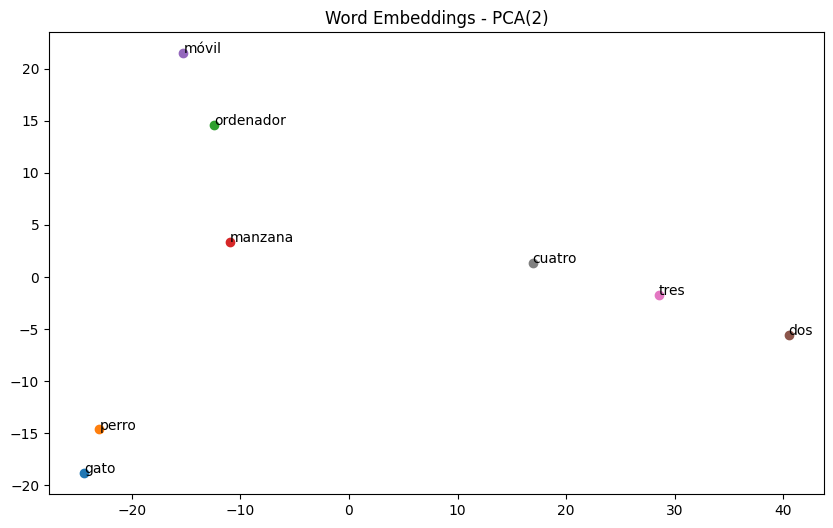

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

text = "gato perro ordenador manzana móvil dos tres cuatro"

# COMIENZA AQUÍ TU CÓDIGO #
# Asegurarnos que que el modulo spacy esta montado.
import spacy
def visualize_embeddings(text):

  # ---- Usar Spacy para convertir el texto a vectores
    doc = nlp(text)
    word_vectors = [token.vector for token in doc]
  # ---- Reducir la dimensionalidad con PCA.
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)
  # ---- Visualizar estos vectores con Matplotlib.
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(doc):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word.text, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.title('Word Embeddings - PCA(2)')
    plt.show()

# Llamar a la función para visualizar los embeddings
visualize_embeddings(text)